In [53]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [54]:
w0 = - ( 2.**(1./3.))/(2. - 2.**(1./3.))
w1 =  ( 1. )/( 2. - 2.**(1./3.))
c1 = w1/2.
c2 = (w0 + w1)/2.
c3 = c2
c4 = c1
d1 = w1
d2 = w0
d3 = d1
print(c1,c2,c3,c4) 
print(d1,d2,d3)
print(c1+c2+c3+c4) 
print(d1+d2+d3)

0.6756035959798289 -0.17560359597982877 -0.17560359597982877 0.6756035959798289
1.3512071919596578 -1.7024143839193153 1.3512071919596578
1.0000000000000002
1.0000000000000002


In [55]:
omega2 = 1

In [56]:
def GetA(x):
    
    dvx = -x
    
    return np.array([dvx])

In [57]:
def GetSimplecticAlgorithm(f,r0,v0,t):
    
    h = t[1] - t[0]
    r = np.zeros_like(t)
    v = np.zeros_like(r)
    
    r[0] = r0
    v[0] = v0
    
    for i in range(1,len(t)):
        r1 = r[i-1] + c1*v[i-1]*h
        v1 = v[i-1] + d1*h*f(r1)
        
        r2 = r1 + c2*v1*h
        v2 = v1 + d2*h*f(r2)
        
        r3 = r2 + c3*v2*h
        v3 = v2 + d3*h*f(r3)
        
        r[i] = r3 + c4*v3*h
        v[i] = v3
        
    r = r[::10]
    v = v[::10]
    t = t[::10]
        
    return r,v,t

In [58]:
def LeapFrog(f,x0,v0,t):
    
    h = t[1] - t[0]
    
    
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(1,len(t)):
        vhalf = v[i-1] + 0.5*h*f(x[i-1])
        
        x[i] = x[i-1] + h*vhalf
        
        v[i] = vhalf + 0.5*h*f(x[i])
        
    return x,v

In [59]:
t = np.linspace(0,10,1000)
r0 = 1
v0 = 0
x_4,v_4,t = GetSimplecticAlgorithm(GetA,r0,v0,t)
x_lf,v_lf = LeapFrog(GetA,r0,v0,t)


C:\Users\juanc\AppData\Local\Temp\ipykernel_8372\1957913286.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r[i] = r3 + c4*v3*h
C:\Users\juanc\AppData\Local\Temp\ipykernel_8372\1957913286.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v[i] = v3
C:\Users\juanc\AppData\Local\Temp\ipykernel_8372\2480319900.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = x[i-1] + h*vhalf
C:\Users\juanc\AppData\Local\Temp\ipykernel_8372\2480319900.py:17: Deprecati

In [60]:

cinetica_lf = (1/2) * (v_lf**2)

potencial_lf = (1/2)*x_lf**2 
mecanica_lf = cinetica_lf+potencial_lf

cinetica_4 = (1/2) * (v_4**2)

potencial_4 = (1/2)*x_4**2 
mecanica_4 = cinetica_4+potencial_4

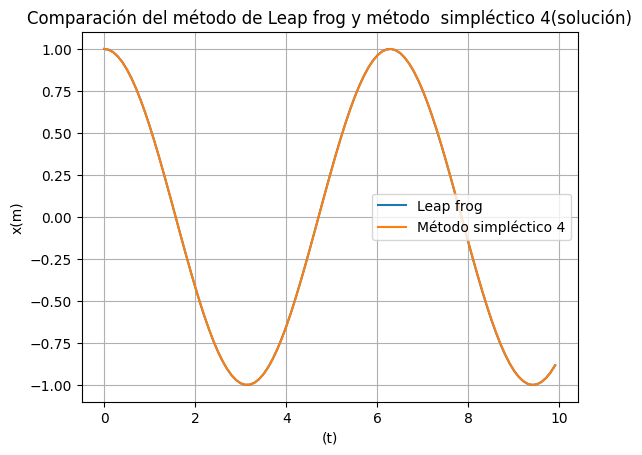

In [61]:
plt.plot(t,x_lf,label="Leap frog")
plt.plot(t,x_4,label="Método simpléctico 4")
plt.xlabel(r"(t)")
plt.ylabel(r"x(m)")
plt.title("Comparación del método de Leap frog y método  simpléctico 4(solución)")
plt.legend()
plt.grid()


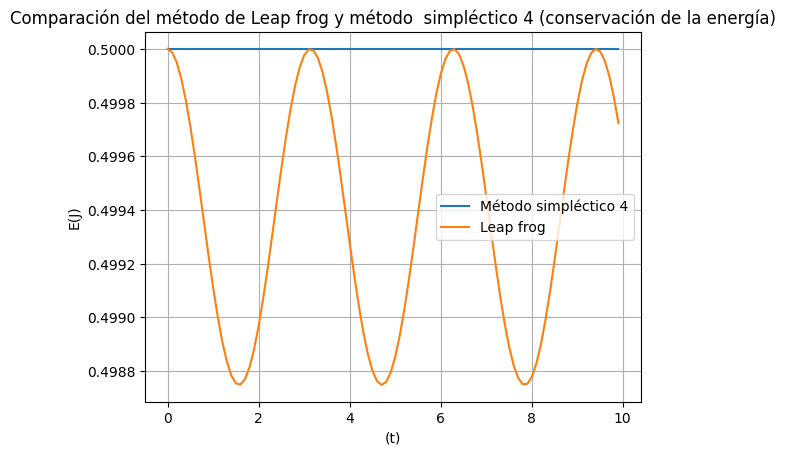

In [62]:
plt.plot(t,mecanica_4,label="Método simpléctico 4")
plt.plot(t,mecanica_lf,label="Leap frog")
plt.xlabel(r"(t)")
plt.ylabel(r"E(J)")
plt.title("Comparación del método de Leap frog y método  simpléctico 4 (conservación de la energía)")
plt.legend()
plt.grid()